<img src="https://www.reliance-project.eu/wp-content/uploads/2021/03/Asset-8mdpi.svg" width="250" align="left" height=100 />
<img src="https://git.man.poznan.pl/stash/projects/ROHUB/repos/rohub-api/browse/rohub_logo.png?raw=" width="250" align="right" height=100 />

# Impact of the Covid-19 Lockdown on Air and Water quality in the Venice Lagoon

In [1]:
pip install rohub rioxarray cmcrameri

Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import rohub
import pooch

import numpy as np
import xarray as xr
import rioxarray

import pandas as pd

import matplotlib.pyplot as plt
import cmcrameri.cm as cmc

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

/opt/conda/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# ROHub Login

In [3]:
rohub_user = open(os.path.join(os.environ['HOME'],"rohub-user")).read().rstrip()
rohub_pwd = open(os.path.join(os.environ['HOME'],"rohub-pwd")).read().rstrip()
rohub.login(username=rohub_user, password=rohub_pwd)

Logged successfully as annefou@geo.uio.no.


# Find and load the first RO

In [4]:
all_ros = rohub.ros_find()
anne_ros = all_ros[all_ros.owner == 'annefou@geo.uio.no']
anne_ros

,identifier,title,description,type,research_areas,status,created_on,created_by,modified_on,access_mode,...,main_entity,communities,score,keywords,domains,places,organizations,persons,concepts,shared_link
0,998dccd6-7192-4d88-af39-6018c71e6bdf,Changes in air and water quality during the Co...,"In this study, we focusing on understanding ch...",Executable Research Object,"[Applied sciences, Earth sciences, Environment...",LIVE,2023-01-08T18:47:51.996769+00:00,annefou@geo.uio.no,2023-01-08T18:47:57.371278+00:00,PUBLIC,...,[],[],0.0,[],[],NaN,[],NaN,[],https://w3id.org/ro-id/998dccd6-7192-4d88-af39...
1,c797fdc7-0330-45de-8970-fedf5ee89cb1,DestinE initiative,Bibliography and other related articles and do...,Bibliography-centric Research Object,[Applied sciences],LIVE,2023-01-06T07:44:32.666494+00:00,annefou@geo.uio.no,2023-01-06T07:44:37.038718+00:00,OPEN,...,[],[],0.0,[],[],NaN,[],NaN,[],https://w3id.org/ro-id/c797fdc7-0330-45de-8970...
4,d5d3a3ed-7bc1-40b9-b2cd-0496f599d0fe,AIS 2020 data prepared for the T-SAR project b...,AIS data prepared and provided by Statsat AS (...,Data-centric Research Object,"[Applied sciences, Earth observation]",LIVE,2022-12-09T08:34:30.338885+00:00,annefou@geo.uio.no,2022-12-09T08:46:24.400926+00:00,PUBLIC,...,[Dataset],[],0.0,[],"[{'name': 'computer science', 'score': '19.6',...",NaN,"[{'name': 'Schutzstaffel', 'wikidata': 'https:...",NaN,"[{'name': 'artificial immune system', 'score':...",https://w3id.org/ro-id/d5d3a3ed-7bc1-40b9-b2cd...
6,871a1786-bc6a-4e60-a160-3f57e3869d35,AGU 2022 - Environmental Data Science Book: a ...,This Research Object aggregates all the differ...,Basic Research Object,"[Applied sciences, Environmental research]",SNAPSHOT,2022-12-23T17:56:48.517142+00:00,annefou@geo.uio.no,2022-12-23T17:57:35.574761+00:00,PUBLIC,...,[Video],[Environmental Data Science Book Community],0.0,[],"[{'name': 'computer science', 'score': '9.7', ...",NaN,[],NaN,"[{'name': 'resource', 'score': '5.3', 'normSco...",https://w3id.org/ro-id/871a1786-bc6a-4e60-a160...
7,9ca6c1ca-a4bd-40d5-a199-c310f94edb0b,AGU 2022 - Environmental Data Science Book: a ...,This Research Object aggregates all the differ...,Basic Research Object,"[Applied sciences, Environmental research]",LIVE,2022-12-08T08:34:52.580430+00:00,annefou@geo.uio.no,2022-12-23T17:57:33.145256+00:00,PUBLIC,...,[Video],[Environmental Data Science Book Community],0.0,[],"[{'name': 'computer science', 'score': '9.7', ...",NaN,[],NaN,"[{'name': 'publication', 'score': '4.9', 'norm...",https://w3id.org/ro-id/9ca6c1ca-a4bd-40d5-a199...
8,107487d2-a9d5-4224-8b00-b321e133b6c8,Pan-European digital assets supporting researc...,Presentation (slides) and demo (video) by Anne...,Basic Research Object,"[Applied sciences, Climatology, Earth observat...",SNAPSHOT,2022-12-05T13:24:25.678141+00:00,annefou@geo.uio.no,2022-12-05T13:25:05.028388+00:00,PUBLIC,...,[Presentation],[],0.0,[],[],NaN,[],NaN,[],https://w3id.org/ro-id/107487d2-a9d5-4224-8b00...
9,b47069ec-f001-4783-8def-cbd54858f571,Pan-European digital assets supporting researc...,Presentation (slides) and demo (video) by Anne...,Basic Research Object,"[Applied sciences, Climatology, Earth observat...",LIVE,2022-12-05T12:17:46.970937+00:00,annefou@geo.uio.no,2022-12-05T13:25:03.375802+00:00,PUBLIC,...,[Presentation],[],0.0,[],[],NaN,[],NaN,[],https://w3id.org/ro-id/b47069ec-f001-4783-8def...
11,df6591e6-c326-4d28-92fb-cb9d59786ac7,Understanding Sea-Ice and the importance of ac...,The research object refers to the Sea ice fore...,Executable Research Object,"[Applied sciences, Environmental research]",LIVE,2022-12-02T12:25:08.853392+00:00,annefou@geo.uio.no,2022-12-05T17:43:05.738435+00:00,PUBLIC,...,[Jupyter Notebook],"[Environmental Data Science Book Community, Pa...",0.0,[],"[{'name': 'meteorology', 'score': '1.1', 'norm...",NaN,[],NaN,"[{'name': 'sea ice', 'score': '18.6', 'normSco...",https://w3id.org/ro-id/df6591e6-c326-4d28-92fb...
13,e7f90fc2-ddcb-4369-9f31-b81123b40533,MultiCompartment Solute Transpo

### Load RO "Impact of the Covid-19 Lockdown on Air quality"

In [5]:
loaded_ro_id = '53aa90bf-c593-4e6d-923f-d4711ac4b0e1'
ro=rohub.ros_load(identifier=loaded_ro_id)

Research Object was successfully loaded with id = 53aa90bf-c593-4e6d-923f-d4711ac4b0e1


In [6]:
ro_resources = rohub.ros_list_resources(identifier = loaded_ro_id)

In [7]:
ro_resources

,identifier,type,source,title,description,url,name,path,size,creator,created_on,modified_on,download_url
0,0fc39920-a4b1-40e6-8154-922c11648611,Software,external,Rendered jupyter notebook on impact of lockdow...,Rendered notebook showing the impact of the Co...,https://nordicesmhub.github.io/RELIANCE/scienc...,Rendered jupyter notebook on impact of lockdow...,https://nordicesmhub.github.io/RELIANCE/scienc...,NaN,annefou@geo.uio.no,2022-02-28T12:09:37.504067+0000,2022-02-28T12:09:38.028034+0000,https://api.rohub.org/api/resources/0fc39920-a...
1,14abf6e3-4ecc-462e-9aa4-4c8a925c304a,Jupyter Notebook,external,Impact of the lockdown on air quality (Jupyter...,Study the impact of the lockdown during the co...,https://raw.githubusercontent.com/NordicESMhub...,Impact of the lockdown on air quality (Jupyter...,https://raw.githubusercontent.com/NordicESMhub...,NaN,annefou@geo.uio.no,2022-05-29T20:03:12.795653+0000,2022-06-01T14:35:47.916370+0000,https://api.rohub.org/api/resources/14abf6e3-4...
2,1d453d7c-72a5-4b23-88a1-4b34fc73a0b0,Data Cube Collection,external,CAMS European air quality forecasts: NO2,CAMS NITROGEN DIOXIDE,https://reliance.adamplatform.eu/?dataset=6962...,CAMS European air quality forecasts: NO2,https://reliance.adamplatform.eu/?dataset=6962...,NaN,annefou@geo.uio.no,2022-05-31T09:59:58.575398+0000,2022-10-21T17:40:36.922187+0000,https://api.rohub.org/api/resources/1d453d7c-7...
3,79d1e316-23f5-4d93-ba9c-b4e48c291797,Data Cube Collection,external,CAMS European air quality forecasts: O3,CAMS OZONE,https://reliance.adamplatform.eu/?dataset=6962...,CAMS European air quality forecasts: O3,https://reliance.adamplatform.eu/?dataset=6962...,NaN,annefou@geo.uio.no,2022-10-21T14:38:13.978164+0000,2022-10-21T14:38:17.014060+0000,https://api.rohub.org/api/resources/79d1e316-2...
4,f39bd071-a179-4718-a36f-c8bc1cbe3072,Data Cube Collection,external,CAMS European air quality forecasts: PM25,CAMS SURFACE PARTICULATE METTER D<2.5,https://reliance.adamplatform.eu/?dataset=6962...,CAMS European air quality forecasts: PM25,https://reliance.adamplatform.eu/?dataset=6962...,NaN,annefou@geo.uio.no,2022-05-31T10:01:40.106991+0000,2022-10-21T17:33:46.237193+0000,https://api.rohub.org/api/resources/f39bd071-a...
5,e5bcb8af-fcbc-4173-8a10-7501a02db5ab,Dataset,external,"NO2 CAMS over Europe March-June 2019, 2020 and...","NO2 CAMS over Europe March-June 2019, 2020 and...",https://zenodo.org/record/7513765/files/NO2_EU...,"NO2 CAMS over Europe March-June 2019, 2020 and...",https://zenodo.org/record/7513765/files/NO2_EU...,NaN,annefou@geo.uio.no,2023-01-08T14:47:29.354507+0000,2023-01-08T14:47:31.746084+0000,https://api.rohub.org/api/resources/e5bcb8af-f...
6,25c2aa47-dc11-41b4-ad96-b516e66c628a,Dataset,external,"O3 CAMS over Europe March-June 2019, 2020 and ...","O3 CAMS over Europe March-June 2019, 2020 and ...",https://zenodo.org/record/7513765/files/O3_EUR...,"O3 CAMS over Europe March-June 2019, 2020 and ...",https://zenodo.org/record/7513765/files/O3_EUR...,NaN,annefou@geo.uio.no,2023-01-08T14:42:05.557815+0000,2023-01-08T14:42:11.840908+0000,https://api.rohub.org/api/resources/25c2aa47-d...
7,d813c1f0-667a-49f5-996a-9226b922f39b,Dataset,external,"PM10 CAMS over Europe March-June 2019, 2020 an...","PM10 CAMS over Europe March-June 2019, 2020 an...",https://zenodo.org/record/7513765/files/PM10_E...,"PM10 CAMS over Europe March-June 2019, 2020 an...",https://zenodo.org/record/7513765/files/PM10_E...,NaN,annefou@geo.uio.no,2023-01-08T14:46:00.841743+0000,2023-01-08T14:46:02.707416+0000,https://api.rohub.org/api/resources/d813c1f0-6...
8,1afcaec9-3b79-42d4-bb87-4349579eaac2,Dataset,external,"PM2.5 CAMS over Europe March-June 2019, 2020 a...","PM2.5 CAMS over Europe March-June 2019, 2020 ...",https://zenodo.org/record/7513765/files/PM2_5_...,"PM2.5 CAMS over Europe March-June 2019, 2020 a...",https://zenodo.org/record/7513765/files/PM2_5_...,NaN,annefou@geo.uio.no,2023-01-08T14:43:48.246969+0000,2023-01-08T14:44:24.439601+0000,https://api.rohub.o

### Get dataset for further reuse

In [8]:
list_dataset = ro_resources.loc[ro_resources['type'] == 'Dataset']
list_dataset

,identifier,type,source,title,description,url,name,path,size,creator,created_on,modified_on,download_url
5,e5bcb8af-fcbc-4173-8a10-7501a02db5ab,Dataset,external,"NO2 CAMS over Europe March-June 2019, 2020 and...","NO2 CAMS over Europe March-June 2019, 2020 and...",https://zenodo.org/record/7513765/files/NO2_EU...,"NO2 CAMS over Europe March-June 2019, 2020 and...",https://zenodo.org/record/7513765/files/NO2_EU...,NaN,annefou@geo.uio.no,2023-01-08T14:47:29.354507+0000,2023-01-08T14:47:31.746084+0000,https://api.rohub.org/api/resources/e5bcb8af-f...
6,25c2aa47-dc11-41b4-ad96-b516e66c628a,Dataset,external,"O3 CAMS over Europe March-June 2019, 2020 and ...","O3 CAMS over Europe March-June 2019, 2020 and ...",https://zenodo.org/record/7513765/files/O3_EUR...,"O3 CAMS over Europe March-June 2019, 2020 and ...",https://zenodo.org/record/7513765/files/O3_EUR...,NaN,annefou@geo.uio.no,2023-01-08T14:42:05.557815+0000,2023-01-08T14:42:11.840908+0000,https://api.rohub.org/api/resources/25c2aa47-d...
7,d813c1f0-667a-49f5-996a-9226b922f39b,Dataset,external,"PM10 CAMS over Europe March-June 2019, 2020 an...","PM10 CAMS over Europe March-June 2019, 2020 an...",https://zenodo.org/record/7513765/files/PM10_E...,"PM10 CAMS over Europe March-June 2019, 2020 an...",https://zenodo.org/record/7513765/files/PM10_E...,NaN,annefou@geo.uio.no,2023-01-08T14:46:00.841743+0000,2023-01-08T14:46:02.707416+0000,https://api.rohub.org/api/resources/d813c1f0-6...
8,1afcaec9-3b79-42d4-bb87-4349579eaac2,Dataset,external,"PM2.5 CAMS over Europe March-June 2019, 2020 a...","PM2.5 CAMS over Europe March-June 2019, 2020 ...",https://zenodo.org/record/7513765/files/PM2_5_...,"PM2.5 CAMS over Europe March-June 2019, 2020 a...",https://zenodo.org/record/7513765/files/PM2_5_...,NaN,annefou@geo.uio.no,2023-01-08T14:43:48.246969+0000,2023-01-08T14:44:24.439601+0000,https://api.rohub.org/api/resources/1afcaec9-3...


In [9]:
filenames = []
for file in list(list_dataset['url']):
    tmpname = pooch.retrieve(
        url=file,
        known_hash=None,
        path=f".",
    )
    filenames.append(tmpname)

In [10]:
dset = xr.open_mfdataset(filenames)
dset

<xarray.Dataset>
Dimensions:    (time: 366, latitude: 400, longitude: 700)
Coordinates:
  * longitude  (longitude) float64 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude   (latitude) float64 69.95 69.85 69.75 69.65 ... 30.25 30.15 30.05
  * time       (time) datetime64[ns] 2019-03-01 2019-03-02 ... 2021-06-30
Data variables:
    NO2        (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
    O3         (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
    PM10       (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
    PM2_5      (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
Attributes:
    transform:      [  0.1          0.         -25.00001201   0.          -0....
    crs:            +init=epsg:4326
    res:            [0.1 0.1]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area
    regrid_method:  conservative

In [11]:
dset.rio.write_crs(4326, inplace=True)

<xarray.Dataset>
Dimensions:      (time: 366, latitude: 400, longitude: 700)
Coordinates:
  * longitude    (longitude) float64 -24.95 -24.85 -24.75 ... 44.75 44.85 44.95
  * latitude     (latitude) float64 69.95 69.85 69.75 ... 30.25 30.15 30.05
  * time         (time) datetime64[ns] 2019-03-01 2019-03-02 ... 2021-06-30
    spatial_ref  int64 0
Data variables:
    NO2          (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
    O3           (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
    PM10         (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
    PM2_5        (time, latitude, longitude) float32 dask.array<chunksize=(366, 400, 700), meta=np.ndarray>
Attributes:
    transform:      [  0.1          0.         -25.00001201   0.          -0....
    res:            [0.1 0.1]
    is_tiled:       0
    nodatavals:     0.0
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area
    regrid_method:  conservative

### Extract data over the Venice Lagoon

In [12]:
geometries = [
    {
        'type': 'Polygon',
        'coordinates': [
          [
            [
              12.93005683439273,
              45.121595450302976
            ],
            [
              12.93005683439273,
              45.58647549643294
            ],
            [
              12.139027321203969,
              45.58647549643294
            ],
            [
              12.139027321203969,
              45.121595450302976
            ],
            [
              12.93005683439273,
              45.121595450302976
            ]
          ]
        ]
    }
]


clipped = dset.rio.clip(geometries)

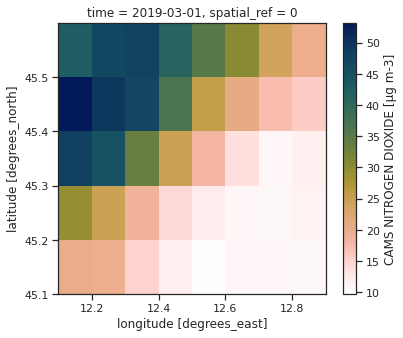

In [13]:
fig = plt.figure(1, figsize=[6, 5])
clipped.isel(time=0).NO2.plot(cmap=cmc.batlowW_r)

# Find and load the second RO

In [14]:
malek_ros = all_ros[all_ros.owner == 'malek.belgacem@ve.ismar.cnr.it']
malek_ros

,identifier,title,description,type,research_areas,status,created_on,created_by,modified_on,access_mode,...,main_entity,communities,score,keywords,domains,places,organizations,persons,concepts,shared_link
44,07e76ee3-fe6c-4fb1-903d-3a8c5236e51b,Quality check CTD profiles against Bottle data,This Jupyter notebook is a tool that can load ...,Basic Research Object,[Applied sciences],LIVE,2022-09-14T21:31:04.699938+00:00,malek.belgacem@ve.ismar.cnr.it,2022-09-22T09:59:46.307872+00:00,PUBLIC,...,[Jupyter Notebook],[],0.0,[],[],NaN,[],NaN,[],https://w3id.org/ro-id/07e76ee3-fe6c-4fb1-903d...
1566,0869e396-3733-4aff-8fb2-94c8937b28aa,Snapshot 2021 study case: Lockdown impacts on ...,This is a case study of snapshot project http:...,Data-centric Research Object,"[Biochemistry, Earth sciences, Oceanography]",LIVE,2021-11-29T14:45:39.803487+00:00,malek.belgacem@ve.ismar.cnr.it,2022-07-15T16:26:33.119790+00:00,PUBLIC,...,[Research Object],[SNAPSHOT: the pandemic and post-pandemic mari...,0.0,[],"[{'name': 'computer science', 'score': '6.3', ...",NaN,[],NaN,"[{'name': 'Adriatic Sea', 'score': '24.4', 'no...",https://w3id.org/ro-id/0869e396-3733-4aff-8fb2...


# Load the Resource

In [15]:
loaded_ro2_id = '0869e396-3733-4aff-8fb2-94c8937b28aa'
ro=rohub.ros_load(identifier=loaded_ro2_id)

Research Object was successfully loaded with id = 0869e396-3733-4aff-8fb2-94c8937b28aa


In [16]:
ro_resources2 = rohub.ros_list_resources(identifier = loaded_ro2_id)

In [17]:
ro_resources2[:]

,identifier,type,source,title,description,url,name,path,size,creator,created_on,modified_on,download_url
0,e1111c84-fe35-4380-84e2-09b388a71116,Dataset,external,PTF dataset(2009-2020)\nPiattaforma acqua allta,Data at the Acqua Alta oceanographic tower is ...,https://datahub.egi.eu/api/v3/onezone/shares/d...,PTF dataset(2009-2020)\nPiattaforma acqua allta,https://datahub.egi.eu/api/v3/onezone/shares/d...,NaN,malek.belgacem@ve.ismar.cnr.it,2022-11-29T15:26:53.739562+0000,2022-11-29T15:46:24.998769+0000,https://api.rohub.org/api/resources/e1111c84-f...
1,b03ad728-6be9-41ef-8652-0464fd478d21,Jupyter Notebook,external,Jupyter notebook using R,None,https://datahub.egi.eu/api/v3/onezone/shares/d...,Jupyter notebook using R,https://datahub.egi.eu/api/v3/onezone/shares/d...,NaN,malek.belgacem@ve.ismar.cnr.it,2021-12-22T14:38:45.256955+0000,2022-11-29T16:15:06.244156+0000,https://api.rohub.org/api/resources/b03ad728-6...
2,4306ef8c-a77c-47bb-82ec-a5e7fbb69b99,Paper,external,Dataset description,"In this paper, we describe a 50-year (1965–201...",https://doi.org/10.5194/essd-12-215-2020,Dataset description,https://doi.org/10.5194/essd-12-215-2020,NaN,malek.belgacem@ve.ismar.cnr.it,2022-11-29T16:05:17.920104+0000,2022-11-29T16:06:05.302894+0000,https://api.rohub.org/api/resources/4306ef8c-a...
3,4fafc868-5281-4795-bae1-4cd1a07ca59b,Dataset,external,Dataset source,The present database contains observations for...,https://zenodo.org/record/3516717#.YboDGWjMI2x,Dataset source,https://zenodo.org/record/3516717#.YboDGWjMI2x,NaN,malek.belgacem@ve.ismar.cnr.it,2022-11-29T16:06:59.179645+0000,2022-11-29T16:07:01.609968+0000,https://api.rohub.org/api/resources/4fafc868-5...
4,eaee63ca-aaa5-46eb-8b8a-0d696d1340e9,Sketch,internal,None,None,None,image.jfif,image.jfif,88174.0,malek.belgacem@ve.ismar.cnr.it,2022-07-15T16:29:07.183540+0000,2022-07-15T16:29:09.785552+0000,https://api.rohub.org/api/resources/eaee63ca-a...
5,a9d3ba55-00b7-4464-aad0-3952a2dbb790,Sketch,internal,None,None,None,reliance deliv dec2021.png,reliance deliv dec2021.png,1049814.0,malek.belgacem@ve.ismar.cnr.it,2022-06-20T16:04:36.560454+0000,2022-06-20T16:04:39.653254+0000,https://api.rohub.org/api/resources/a9d3ba55-0...
6,1b950828-28e0-4725-abcb-73f33d0bf32e,File,internal,None,None,None,NO3_change_obsvspred2020.png,Output/NO3_change_obsvspred2020.png,26131.0,malek.belgacem@ve.ismar.cnr.it,2021-12-22T14:05:23.636780+0000,2021-12-22T14:05:23.638961+0000,https://api.rohub.org/api/resources/1b950828-2...
7,32f66214-fac2-44b8-af57-559916593747,File,internal,NO3_ts_ptf_decompose.png,None,None,NO3_ts_ptf_decompose.png,Output/NO3_ts_ptf_decompose.png,41569.0,malek.belgacem@ve.ismar.cnr.it,2021-12-22T14:06:14.381079+0000,2021-12-22T14:06:44.434429+0000,https://api.rohub.org/api/resources/32f66214-f...
8,548ed54f-2d96-4e0c-9633-cbb22a04fd20,File,internal,None,None,None,NO3_predict_obsvspred2020vs20092019.png,Output/NO3_predict_obsvspred2020vs20092019.png,55841.0,malek.belgacem@ve.ismar.cnr.it,2021-12-22T14:06:01.775038+0000,2021-12-22T14:06:01.777430+0000,https://api.rohub.org/api/resources/548ed54f-2...
9,aa6894c2-5c4d-4c39-817b-d63fb155141d,File,internal,None,None,None,NO3_predict_obsvspred2020.png,Output/NO3_predict_obsvspred2020.png,49353.0,malek.belgacem@ve.ismar.cnr.it,2021-12-22T14:05:43.603856+0000,2021-12-22T14:05:43.605820+0000,https://api.rohub.org/api/resources/aa6894c2-5...


In [18]:
loaded_res_id2 = ro_resources2.loc[0, 'identifier']
loaded_res2 = rohub.resource_load(identifier = loaded_res_id2)

Resource was successfully loaded with id = e1111c84-fe35-4380-84e2-09b388a71116


In [19]:
PTFfilename = pooch.retrieve(
        url=loaded_res2.download_url,
        known_hash=None,
        path=f".",
    )

In [20]:
PTF = pd.read_csv(PTFfilename, sep = ";", index_col="DATE", infer_datetime_format=True, parse_dates=True)
PTF

,LON,LAT,BDEPTH,DEPTH,TEMP,SAL,DENS,O2per,O2mll,pH,CHLAa,TURB,NH3,NO2,NO3,SiO4,PO4,SECCHI,CHLA,PHAEO
DATE,,,,,,,,,,,,,,,,,,,,
2009-01-16,12.51,45.31,17,0.6,9.8540,37.6210,29.026,110.83000,9.87000,8.03,0.6700,1.8800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-16,12.51,45.31,17,1.5,9.8530,37.6310,29.035,111.29000,9.91000,8.03,0.7600,1.8300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-16,12.51,45.31,17,2.5,9.8570,37.6360,29.038,111.80000,9.95000,8.03,0.7200,1.9600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-16,12.51,45.31,17,3.4,9.8620,37.6220,29.026,112.23000,9.99000,8.03,0.8000,1.8400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-16,12.51,45.31,17,4.7,9.8610,37.6240,29.028,112.56000,10.02000,8.03,0.8900,1.8900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-11,12.51,45.31,17,13.5,13.9439,37.6827,NaN,94.00275,5.37532,NaN,1.2893,3.5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-11,12.51,45.31,17,14.0,13.9433,37.6963,NaN,94.04048,5.37709,NaN,1.3507,3.5856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-11,12.51,45.31,17,14.5,13.9543,37.7043,NaN,93.93828,5.36979,NaN,1.3928,3.3817,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fill missing values and compute monthly averages

In [21]:
PTF_fill = PTF.interpolate()
PTF_fill["year"] = PTF_fill.index.year
PTF_fill["month"] = PTF_fill.index.month

In [22]:
PTF_avg = PTF_fill.resample("M").mean()
PTF_avg

,LON,LAT,BDEPTH,DEPTH,TEMP,SAL,DENS,O2per,O2mll,pH,...,NH3,NO2,NO3,SiO4,PO4,SECCHI,CHLA,PHAEO,year,month
DATE,,,,,,,,,,,,,,,,,,,,,
2009-01-31,12.51,45.31,17.0,7.98125,9.798500,37.616875,29.03300,112.737500,10.050625,8.03625,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,1.0
2009-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-05-31,12.51,45.31,17.0,8.01250,15.459563,32.923125,24.27375,118.106250,9.623750,8.24125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,12.51,45.31,17.0,8.25000,25.136727,35.421943,29.61150,103.467492,4.878006,8.03000,...,1.590,0.150,0.620,1.465,0.075,8.929839,0.840,0.55,2020.0,8.0
2020-09-30,12.51,45.31,17.0,8.25000,24.709397,36.092394,29.61150,102.726254,4.860642,8.03000,...,0.235,0.205,0.840,4.990,0.055,8.779839,0.895,0.55,2020.0,9.0
2020-10-31,12.51,45.31,17.0,8.25000,20.152960,36.783437,29.61150,100.054802,5.110311,8.03000,...,0.370,0.290,1.685,3.615,0.095,7.491667,0.805,0.55,2020.0,10.0


## Compare NO2 from Copernicus air quality forecasts and NO2 from water measurements

### Plot NO2 from water measurements over the Venice lagoon

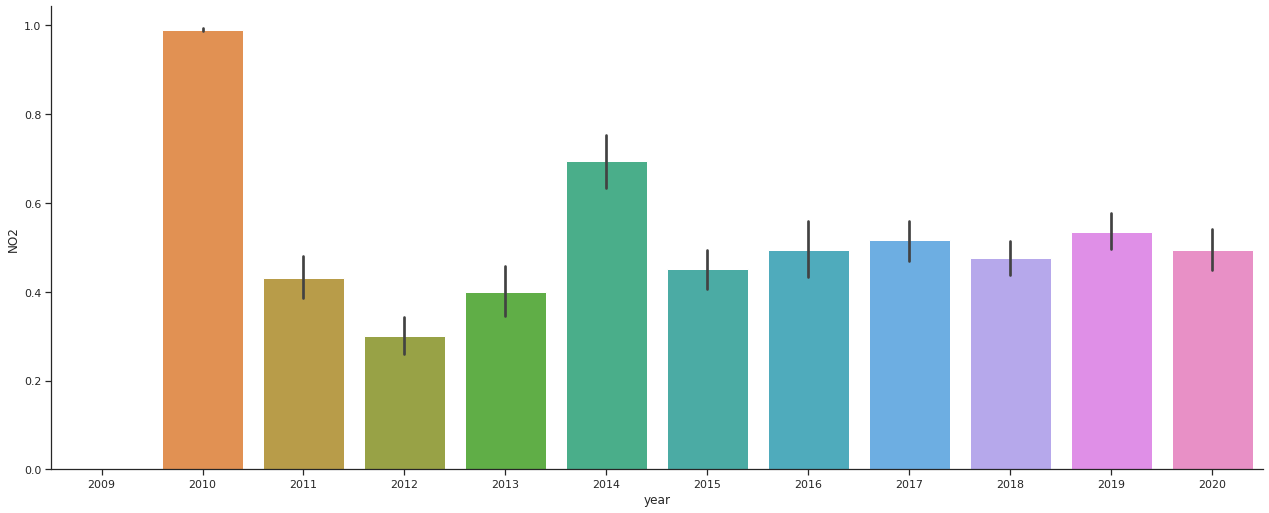

In [23]:
variable = "NO2"
ax = sns.catplot(y=variable, x="year", kind="bar", data=PTF_fill, height=7, aspect=2.5)

In [24]:
PTF_March_June = PTF_fill.loc[(PTF_fill.year >= 2019) & (PTF_fill.month <= 6) & (PTF_fill.month >= 3)]
PTF_March_June

,LON,LAT,BDEPTH,DEPTH,TEMP,SAL,DENS,O2per,O2mll,pH,...,NH3,NO2,NO3,SiO4,PO4,SECCHI,CHLA,PHAEO,year,month
DATE,,,,,,,,,,,,,,,,,,,,,
2019-04-10,12.51,45.31,17,0.5,13.3802,36.3893,29.6115,105.44493,6.14801,8.03,...,0.010000,1.150000,4.900000,5.840000,0.080000,2.400000,0.880000,0.320000,2019,4
2019-04-10,12.51,45.31,17,1.0,13.2622,36.5490,29.6115,106.30485,6.20691,8.03,...,0.023030,1.126970,4.759697,5.766364,0.079394,2.476471,0.882424,0.318485,2019,4
2019-04-10,12.51,45.31,17,1.5,13.1418,36.7305,29.6115,106.90035,6.24993,8.03,...,0.036061,1.103939,4.619394,5.692727,0.078788,2.552941,0.884848,0.316970,2019,4
2019-04-10,12.51,45.31,17,2.0,13.0851,36.8399,29.6115,107.52580,6.28948,8.03,...,0.049091,1.080909,4.479091,5.619091,0.078182,2.629412,0.887273,0.315455,2019,4
2019-04-10,12.51,45.31,17,2.5,12.9536,37.0232,29.6115,107.33856,6.28820,8.03,...,0.062121,1.057879,4.338788,5.545455,0.077576,2.705882,0.889697,0.313939,2019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-10,12.51,45.31,20,17.0,17.3225,37.4023,29.6115,102.56979,5.09493,8.03,...,0.437568,0.226486,6.002432,5.613243,0.090000,5.578947,2.028649,0.550000,2020,6
2020-06-10,12.51,45.31,20,17.5,17.0675,37.5406,29.6115,97.67811,5.09328,8.03,...,0.435676,0.204865,5.474324,5.332432,0.090000,5.663158,2.016486,0.550000,2020,6
2020-06-10,12.51,45.31,20,18.0,16.9602,37.5970,29.6115,94.86617,5.07660,8.03,...,0.433784,0.183243,4.946216,5.051622,0.090000,5.747368,2.004324,0.550000,2020,6


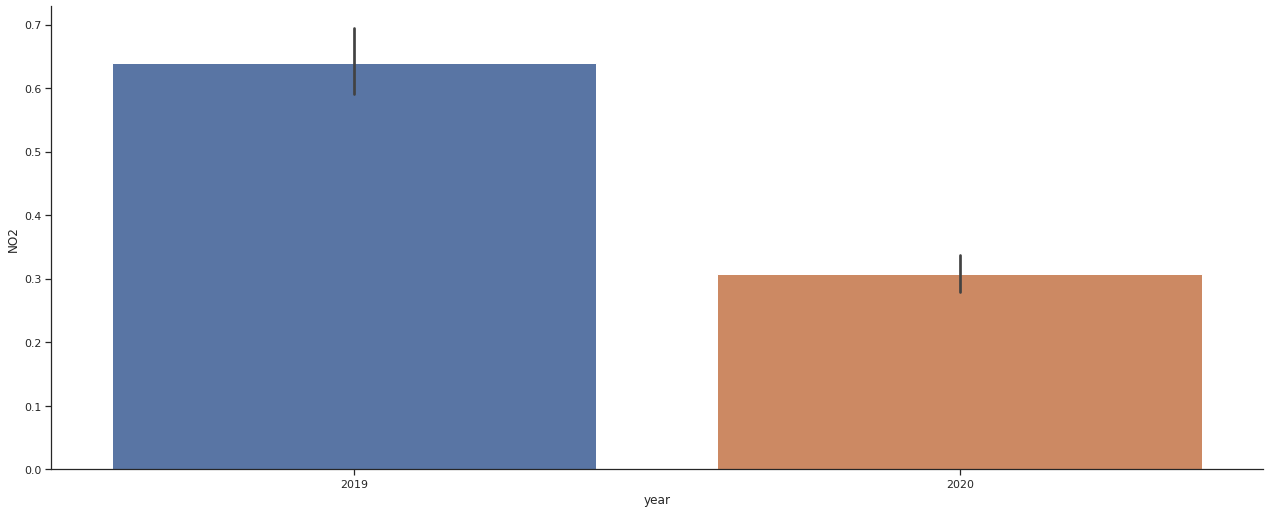

In [25]:
variable = "NO2"
ax = sns.catplot(y=variable, x="year", kind="bar", data=PTF_March_June, height=7, aspect=2.5)

In [26]:
PTF_2019 = PTF_March_June.loc[PTF_March_June.year == 2019].groupby("year").mean()
PTF_2020 = PTF_March_June.loc[PTF_March_June.year == 2020].groupby("year").mean()

ratio_PTF = PTF_2019["NO2"].values / PTF_2020["NO2"].values
ratio_PTF

array([2.08150227])

### Plot NO2 from air-quality forecasts over the Venice Lagoon

In [27]:
def plot_stats(variable, lat, lon, df): 
    dt = df.sel(latitude=lat, longitude=lon, method="nearest").to_dataframe()
    dt.reset_index(inplace=True)
    dt['datetime'] = pd.DatetimeIndex(dt['time']).year
    dt["year"] = pd.DatetimeIndex(dt['time']).year
    dt = dt.groupby("datetime").mean()
    dt['name'] = 'Venice Lagoon'
    ax = sns.catplot(x="name", y=variable, hue="year", kind="bar", data=dt, height=7, aspect=2.5)
    
    ax.fig.suptitle('Total ' + variable + ' averaged (March-June) over the Venice Lagoon')
    return dt

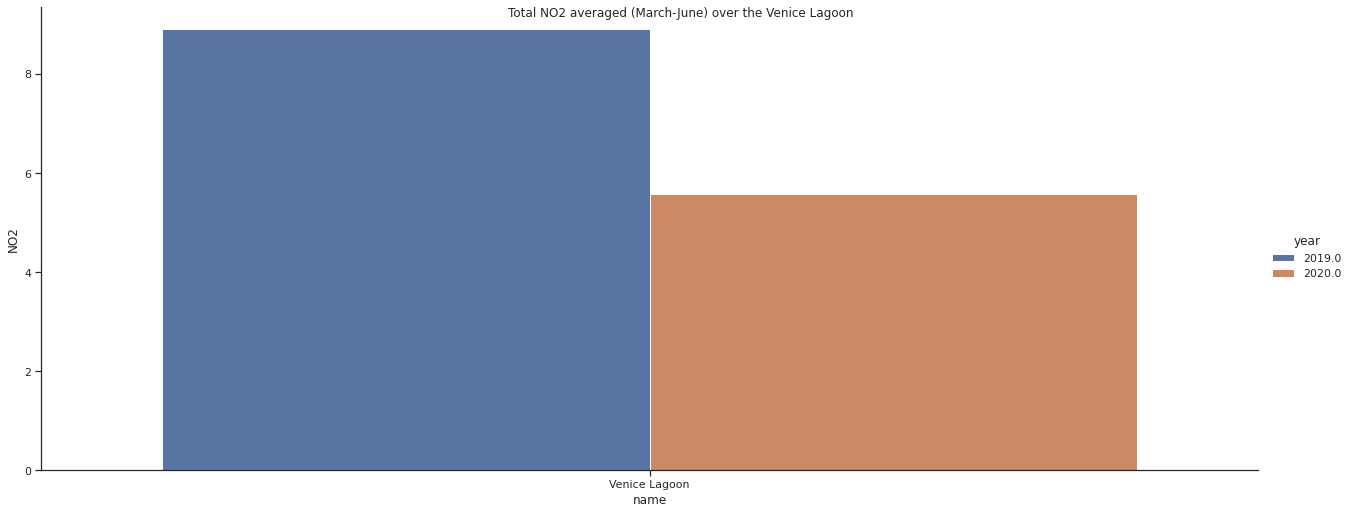

In [28]:
dd = plot_stats("NO2", PTF_March_June.LAT.mean(), PTF_March_June.LON.mean(), clipped.sel(time=slice("2019-01-01","2020-12-31")))

### Compute ratio between NO2 in 2019 and 2020

In [29]:
dd_2019 = dd.loc[dd['year'] == 2019]
dd_2020 = dd.loc[dd['year'] == 2020]

ratio_cams = dd_2019["NO2"].values / dd_2020["NO2"].values
ratio_cams

array([1.597712], dtype=float32)

In [30]:
print(ratio_PTF, ratio_cams)

[2.08150227] [1.597712]
